In [2]:
import math
from math import sin
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import random

def draw_1_scatter (l0, l1, color):
    plt.scatter (l0, l1, c=color)
    plt.show()
    
def draw_2_scatters ( l0, l1, color1, label1, l2, color2, label2):
    p1=plt.scatter (l0, l1, c=color1, s=10) # s: marker size
    p2=plt.scatter (l0, l2, c=color2, s=10)
    
    plt.legend( (p1,p2), (label1, label2), scatterpoints=1, loc='lower left', ncol=1, fontsize=10)
    plt.show()
    
def draw_1_line (title, xlabel, ylabel, ymin,ymax, l0, l1, color1, label1  ):

    fig = plt.figure() 
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1, label= label1 )
    plt.title(title )
    ax.legend()
    plt.xlabel(xlabel ) 
    plt.ylabel(ylabel )
    ax.set_ylim([ymin,ymax])
#     plt.savefig('D:/Sweden/p3/ANN/lab1/part2/'+ title + '.png', dpi=300)
    plt.show()
    

def draw_learning_curve(error_list):
    x = np.arange(1, np.size(error_list)+1, 1)
    y = error_list
    plt.plot(x, y, 'r--')
    plt.title ("learning curve")
    plt.show()
    
def mean_squared_error(prediction, target, data_input):
    constant = 0.5/(len(data_input[0]))
    mse = constant * (prediction - target)**2
    return  mse

def absolute_residual_error(prediction, target, data_input):
    constant = 1/(len(data_input))
    summed_e =0
    for i in range (0, len(data_input)) :
        summed_e += abs(prediction[i] - target[i])
    avg_e = constant * summed_e

    return avg_e


data_train = np.loadtxt( 'data_lab2/ballist.dat' )
data_test  = np.loadtxt( 'data_lab2/balltest.dat' )

train_in_2d = data_train [:,0:2]
train_out_2d = data_train [:,2:4]

test_in_2d = data_test [:,0:2]
test_out_2d = data_test [:,2:4]


from mpl_toolkits.mplot3d import Axes3D

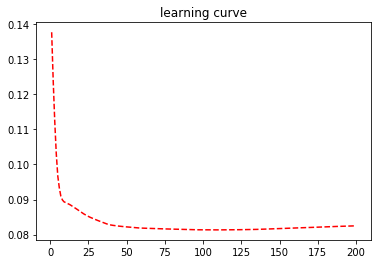

error: 0.08250900476949816


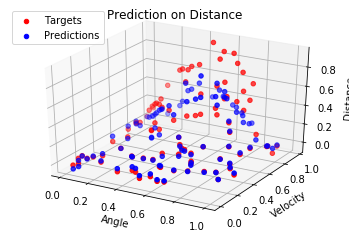

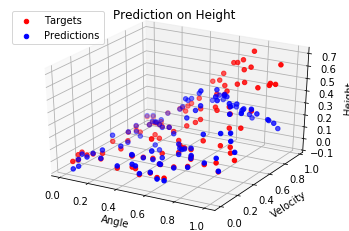

array([[ 0.07193137,  0.05282662],
       [-0.09137158, -0.11949413],
       [ 0.87770805,  0.58344401],
       [-0.26338438, -0.1867424 ],
       [ 0.04941191,  0.3555161 ],
       [-0.09027922, -0.24039848],
       [ 0.04525859,  0.03133422],
       [-0.01137542, -0.05711988],
       [ 0.07045119,  0.15401657],
       [ 0.11108061,  0.02749777]])

In [6]:
def compute_RBF_matrix_2d (inputs, mu, var, nb_rbf): 
    inputs_t = np.transpose(inputs)
    nb_data = np.shape(inputs)[0] # how many data points in input
    RBF_matrix = np.zeros((nb_data, nb_rbf)) # 100 * 8

    for j in range(nb_rbf):
        for i in range(nb_data):
            # euclidean distance = square_root ( (x_a - mu_a)**2 - (x_b - mu_b)**2 )
            # inputs_t[:, i] = a vector (x_a, x_b)
            # mu[:, j] = a vector (mu_a, mu_b)
            dist = np.sqrt(np.dot(np.transpose((inputs_t[:, i] - mu[:, j])), (inputs_t[:, i] - mu[:, j]))  )
            p = -(dist)**2
            q = 2*(var**2)
            RBF_matrix[i, j] = np.exp(p/q)

    return RBF_matrix   

def predict_2d (test_in, w,  mu, var, nb_rbf ):
    RBF_matrix = compute_RBF_matrix_2d (test_in, mu, var, nb_rbf)
    prediction = np.dot(RBF_matrix, w)
    return prediction

def place_rbfs(inputs, nb_rbf, competitive_learning, l_rate):
    
    inputs_t = np.transpose(inputs)
    nb_data, input_dim = np.shape(inputs) # Number of input patterns, input patterns dimension
    mu = np.zeros((input_dim, nb_rbf)) # RBF weights
    
    indices = np.arange(nb_data)
    np.random.shuffle(indices)
    for i in range(nb_rbf):
        mu[:, i] = inputs[indices[i], :]
    
    if competitive_learning == "cl":
        indices = np.arange(nb_data)  #         print ("indices: ",indices)  # 0,1,2,...,99
        np.random.shuffle(indices)
        for i in range(len(indices)):
            min_dist = 10000000
            for j in range(nb_rbf):
                cur_dist = np.dot(np.transpose((inputs_t[:, i] - mu[:, j])), (inputs_t[:, i] - mu[:, j]))
                if cur_dist < min_dist:
                    min_dist = cur_dist
                    min_rbf = j
            mu[:, min_rbf] += l_rate * (np.transpose(inputs)[:, i] - mu[:, min_rbf])
        
    return mu



def absolute_residual_error_2d(predictions, targets):
    e= np.absolute(predictions - targets)
    return np.mean(e)

def draw_prediction (test_in, test_out, w,  mu, var, nb_rbf):
    predictions = predict_2d (test_in, w,  mu, var, nb_rbf )
    
    ax = plt.axes(projection='3d')
    ax.scatter(test_in[:, 0], test_in[:, 1], test_out[:, 0], label="Targets", c='r')
    ax.scatter(test_in[:, 0], test_in[:, 1], predictions[:, 0], label="Predictions", c= 'b')
    ax.set_xlabel('Angle')
    ax.set_ylabel('Velocity')
    ax.set_zlabel('Distance')
    plt.legend(loc="upper left")
    plt.title("Prediction on Distance")
    title= "TwoDim_pred_Distance"
    plt.savefig('D:/Sweden/p3/ANN/lab2/'+ title + '.png', dpi=300)
    plt.show()
    
    ax = plt.axes(projection='3d')
    ax.scatter(test_in[:, 0], test_in[:, 1], test_out[:, 1], label="Targets", c='r')
    ax.scatter(test_in[:, 0], test_in[:, 1], predictions[:, 1], label="Predictions", c= 'b')
    ax.set_xlabel('Angle')
    ax.set_ylabel('Velocity')
    ax.set_zlabel('Height')
    plt.legend(loc="upper left")
    plt.title("Prediction on Height")
    title= "TwoDim_pred_Height"
    plt.savefig('D:/Sweden/p3/ANN/lab2/'+ title + '.png', dpi=300)
    plt.show()
    return 

def RBFlearning_batch_withCL_2D (train_in, train_out, test_in, test_out,
                                 nb_rbf, mu, var, epoch, l_rate ):

    nb_data, input_dim = np.shape(train_in)
    w = np.zeros((nb_rbf, input_dim ))
    error_list =[]
    for i in range(epoch):
        
        RBF_matrix = compute_RBF_matrix_2d (train_in, mu, var, nb_rbf)
        calculated_target = np.dot(RBF_matrix, w)
        diff = train_out - calculated_target 
        delta_w = learning_rate * (RBF_matrix.T.dot(diff)) 
        w = w + delta_w
        
        pred = predict_2d (train_in, w,  mu, var, nb_rbf )
        e = absolute_residual_error_2d(pred, train_out)
        error_list.append(e)
    draw_learning_curve(error_list)
    print ("error:", error_list[-1])
    draw_prediction (test_in, test_out, w,  mu, var, nb_rbf)
    return w



learning_rate = 0.01
epoch = 200
nb_rbf = 10
var = 0.2

mu = place_rbfs(train_in_2d, nb_rbf, "cl", learning_rate)

RBFlearning_batch_withCL_2D (train_in_2d, train_out_2d, test_in_2d, test_out_2d,
                                 nb_rbf, mu, var, epoch, learning_rate )